# Lecture 3 - Array Data Structure

- Collection of variables of same data type with contigious memory addresses.
- One of the primary data structure.
- Physical data structure unlike other data strucutures which are logical.

**Physical vs Logical Data Structure**


In [25]:
from array import *

# |1|2|3|4|5|6|
# |0|1|2|3|4|5|
# |0x00856|0x00860|0x00864|0x00868|0x00872|0x00876|
# arr = 0x00856 = base_address
# arr[0] = 0x00856 + 0 = base_address + 0 = 0x00856
# arr[1] = 0x00856 + 1*sizeOf(type_code) = base_address + 4 = 0x00860
# arr[2] = 0x00856 + 2*sizeOf(type_code) = base_address + 2 = 
# arr[3] = 0x00856 + 3*sizeOf(type_code) = base_address + 3 = 
# arr[4] = 0x00856 + 4 = base_address + 4 = 
# arr[5] = 0x00856 + 5 = base_address + 5 = 
arr = array('i', [1, 2, 3, 4, 5])

# array of chars has a special called string.
# |'U'|'m'|'a'|'i'|'r'|
# name = "Umair123"
# array('c', [U,m,a,i,r,1,2,3])

# accessing one element
# arr[0]
# print(arr[0])

# Traversing = visiting each element once
# for val in arr:
#     print(val)
    
# for i in range(len(arr)):
#     print(arr[i])

# arr[5] = 100 # index out of bound

# append - add element at the end = 
arr.append(99)
print(arr)

# insert - add an element at specific index = 
[1, 99, 2, 3, 4, 5]
arr.insert(1, 99)
print(arr)

# update - at specific index = 
arr[1] = 87
print(arr)

# remove by element = 
arr.remove(5)
print(arr)
# arr.remove(7) # when element is not found

# remove element at specific index
[1, 99, 2, 3, 4, 5]
arr.pop(2)
print(arr)

array('i', [1, 2, 3, 4, 5, 99])
array('i', [1, 99, 2, 3, 4, 5, 99])
array('i', [1, 87, 2, 3, 4, 5, 99])
array('i', [1, 87, 2, 3, 4, 99])
array('i', [1, 87, 3, 4, 99])


### Array Abstract Data Type

In [26]:
from array import *

myarray = MyArray('i', 1,2,3,4,45,5,5,5,5,6,6)

class MyArray(object):
    def __init__(self, typecode='i', *args):
        self._typecode = typecode
        initial_values = [arg for arg in args]
        self._arr = array(typecode, initial_values)
        self._capacity = len(initial_values)
        self._size = len(args)

    # same as arr[i]; syntactic sugar
    # 0(1) => base_address + index
    def get(self, index):
        return self._arr[index]

    # same as arr[0] = 10; syntactic sugar
    # 0(1) => base_address + index
    def set(self, index, value):
        self._arr[index] = value

    # 0(1)
    def size(self):
        return self._size

    # 0(n) 
    # Amortized O(1)
    def append(self, value):
        self._size += 1 # O(1)

        if self._size > self._capacity: # O(1)
            self._arr = self.expand_capacity(self._arr) # O(n)

        self._arr[self._size-1] = value

        return self


    def remove(self, value):
        index = -1
        for i in range(self.__size):
            if self._arr[i] == value:
                index = i
                break;

        if index == -1:
            print("throw exception")

        # 1,2,null,4,5
        k = index + 1
        while k < self._size:
            self._arr[k-1] = self._arr[k]
            k += 1

        self._size -= 1

        return self


    def insert(self, index, value):
        print("insert")


    def pop(self, index = -1):
        print("pop")

    def __str__(self):
        return "arr={} size={} capacity={}".format(self._arr, self._size, self._capacity)


    # O(n)
    def expand_capacity(self, current_arr):
        if len(current_arr) == 0:
            new_arr = array(self._typecode, [-1])
        else:
            new_arr = array(self._typecode, [i for i in range(2 * len(current_arr))]) # O(n)

        # O(n)
        for j in range(len(current_arr)):
            new_arr[j] = current_arr[j]

        return new_arr

myarray = MyArray('i', 100, 200)
myarray.append(300)
print(myarray.size())
print(myarray.get(0))
print(myarray.get(1))
print(myarray.get(2))

3
100
200
300


In [27]:
import unittest

class MyArrayTests(unittest.TestCase):

    def test_size_when_empty_myarray(self):
        # Arrange
        myarray = MyArray()

        # Act
        size = myarray.size()

        # Assert
        self.assertEqual(0, size)

    def test_get_when_empty_myarray(self):
        # Arrange
        myarray = MyArray()

        # Act & Assert
        self.assertRaises(IndexError, myarray.get, 0)

    def test_size_when_single_element_in_myarray(self):
        # Arrange
        myarray = MyArray('i', 100)

        # Act
        size = myarray.size()

        # Assert
        self.assertEqual(1, size)

    def test_size_when_more_than_one_element_in_myarray(self):
        # Arrange
#         |100|200| = memory
#         array('i', [100, 200]) = python
        myarray = MyArray('i', 100, 200) # Umair Ahmed Khan

        # Act
        size = myarray.size()

        # Assert
        self.assertEqual(2, size)

    def test_get_when_single_element_in_myarray(self):
        # Arrange
        myarray = MyArray('i', 100)

        # Act
        element = myarray.get(0)

        # Assert
        self.assertEqual(100, element)

    def test_get_when_more_than_one_element_in_myarray(self):
        # Arrange
        myarray = MyArray('i', 100, 200)

        # Act
        element_1 = myarray.get(0)
        element_2 = myarray.get(1)

        # Assert
        self.assertEqual(100, element_1)
        self.assertEqual(200, element_2)

    def test_set_when_empty_myarray(self):
        # Arrange
        myarray = MyArray('i')

        # Act & Assert
        self.assertRaises(IndexError, myarray.set, 0, 100)

    def test_set_when_single_element_in_myarray(self):
        # Arrange
        myarray = MyArray('i', 100)

        # Act
        myarray.set(0, 200)

        # Assert
        self.assertEqual(200, myarray.get(0))

    def test_set_when_more_than_one_element_in_myarray(self):
        # Arrange
        myarray = MyArray('i', 100, 200)

        # Act
        myarray.set(1, 300)

        # Assert
        self.assertEqual(300, myarray.get(1))

    def test_append_when_empty_myarray(self):
        # Arrange
        myarray = MyArray('i')

        # Act
        myarray.append(100)

        # Assert
        self.assertEqual(1, myarray.size())
        self.assertEqual(100, myarray.get(0))

    def test_append_when_single_element_in_myarray(self):
        # Arrange
        myarray = MyArray('i', 100)

        # Act
        myarray.append(200)

        # Assert
        self.assertEqual(2, myarray.size())
        self.assertEqual(100, myarray.get(0))
        self.assertEqual(200, myarray.get(1))

    def test_append_when_more_than_one_element_in_myarray(self):
        # Arrange
        myarray = MyArray('i', 100, 200)

        # Act
        myarray.append(300)

        # Assert
        self.assertEqual(3, myarray.size())
        self.assertEqual(100, myarray.get(0))
        self.assertEqual(200, myarray.get(1))
        self.assertEqual(300, myarray.get(2))
        
unittest.main(argv=['ignored'], exit=False)

............
----------------------------------------------------------------------
Ran 12 tests in 0.006s

OK


### Time Complexity Analysis

In [3]:
import numpy as np
from time import time
from array import *

%matplotlib inline
import matplotlib.pyplot as plt

def graph(x, y, legend):
    fig = plt.figure(figsize=(6, 5), dpi=120)
    axes = fig.add_subplot(111)
    plot(x, y)
    plt.legend(legend)
    plt.xlabel("Input size (N)")
    plt.ylabel("Runtime (sec)")
    plt.title("Array Data Structure Complexity Analysis")
    pass

def plot(x, y, label=None):
    plt.plot(x, y, "-o", linewidth=0.95)
    plt.grid(True)

def profile(func, arg1, arg2 = None):
    initial_time = time()

    if arg1 != None and arg2 != None:
        func(arg1, arg2)
    elif arg1 != None:
        func(arg1)
        
    final_time = time()
    time_elapsed = final_time - initial_time
    return time_elapsed

### Array Insert

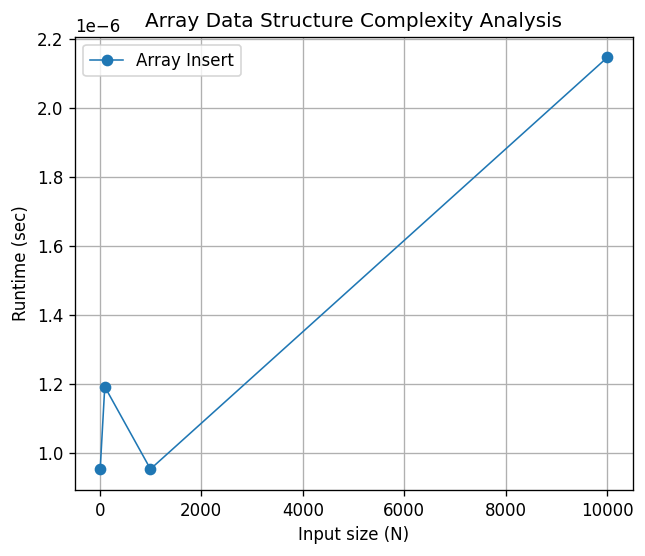

In [4]:
legend = ("Array Insert", "")
inputs = []
for x in [10, 100, 1000, 10000]:
    inputs.append([array('i', [i for i in range(x)])])
    
profiling_data = []
N = []
for input in inputs:
    curr_arr = input[0]
    N.append(len(curr_arr))
    profiling_data.append(profile(curr_arr.insert, 0, 99))
    
graph(N, profiling_data, legend)

### Array Append

In [5]:
def array_append_profiling(scale):
    profiling_data = []
    N = np.array([v for v in range(scale)])
    for (i, j) in enumerate(N):
        profiling_data.append(profile(curr_arr.append, 99))
    return (N, profiling_data)

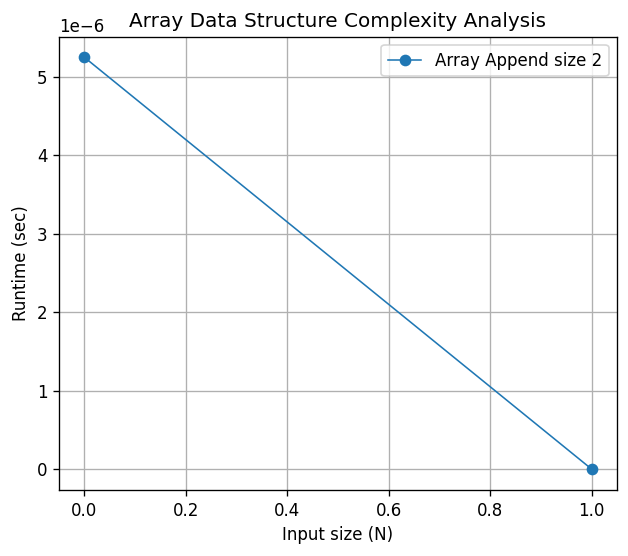

In [6]:
scale = 2
legend = ("Array Append size {}".format(scale), "")
graph(*array_append_profiling(scale), legend)

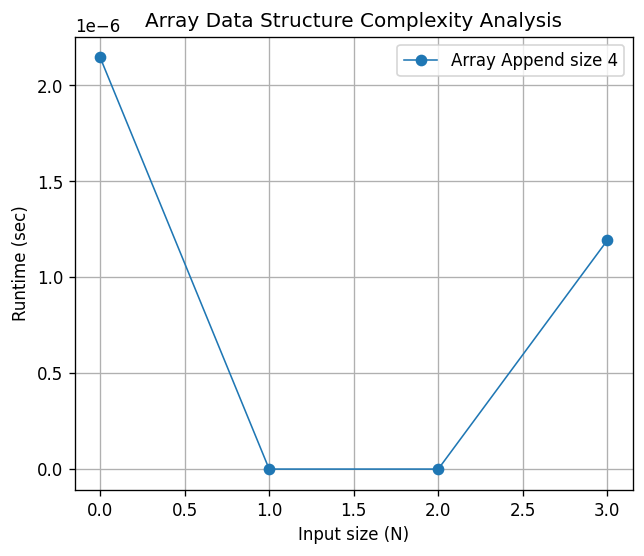

In [7]:
scale = 4
legend = ("Array Append size {}".format(scale), "")
graph(*array_append_profiling(scale), legend)

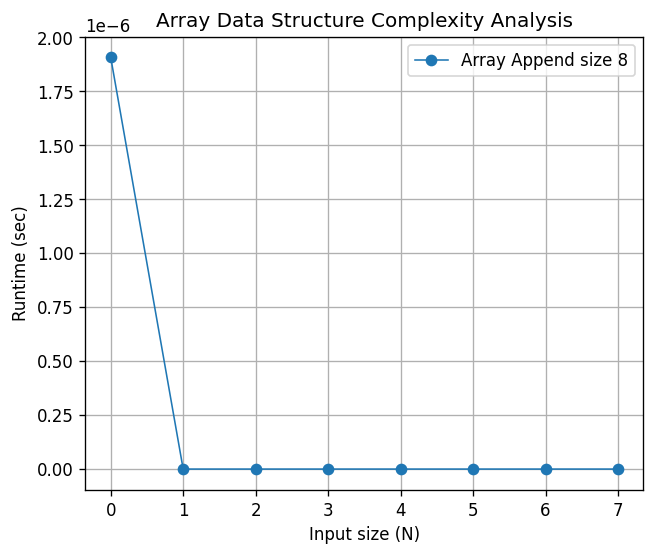

In [8]:
scale = 8
legend = ("Array Append size {}".format(scale), "")
graph(*array_append_profiling(scale), legend)

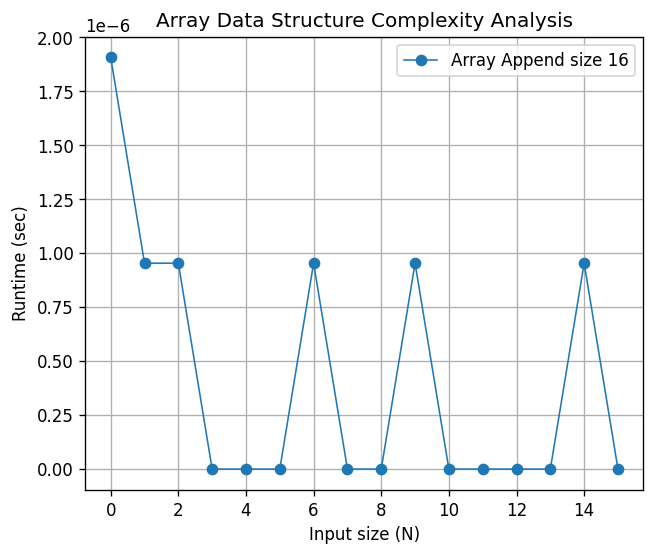

In [9]:
scale = 16
legend = ("Array Append size {}".format(scale), "")
graph(*array_append_profiling(scale), legend)

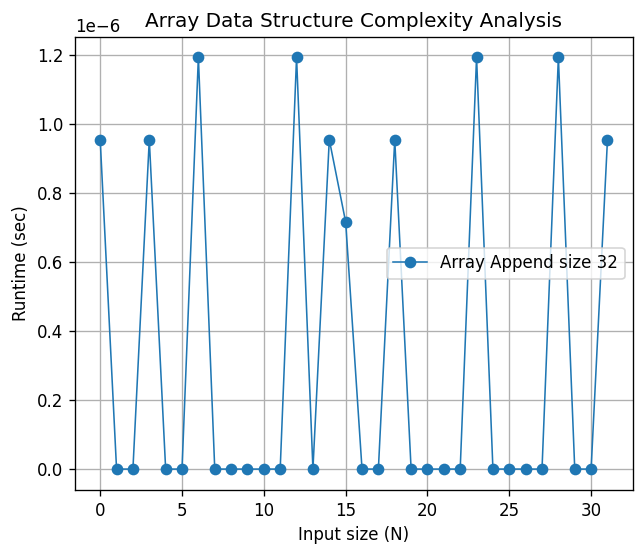

In [10]:
scale = 32
legend = ("Array Append size {}".format(scale), "")
graph(*array_append_profiling(scale), legend)

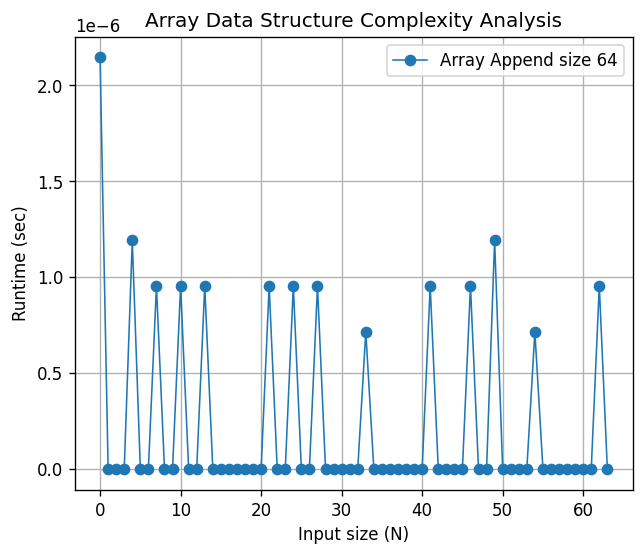

In [11]:
scale = 64
legend = ("Array Append size {}".format(scale), "")
graph(*array_append_profiling(scale), legend)

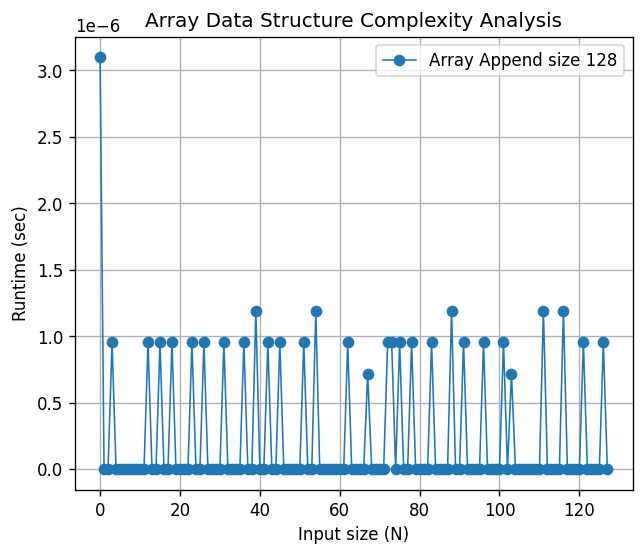

In [12]:
scale = 128
legend = ("Array Append size {}".format(scale), "")
graph(*array_append_profiling(scale), legend)

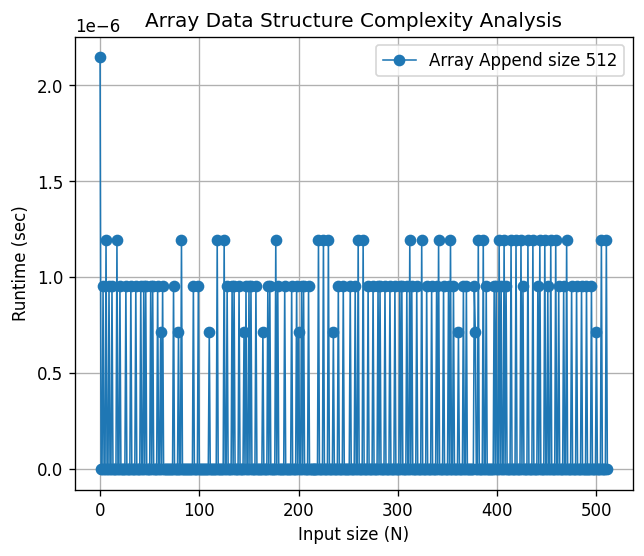

In [13]:
scale = 512
legend = ("Array Append size {}".format(scale), "")
graph(*array_append_profiling(scale), legend)

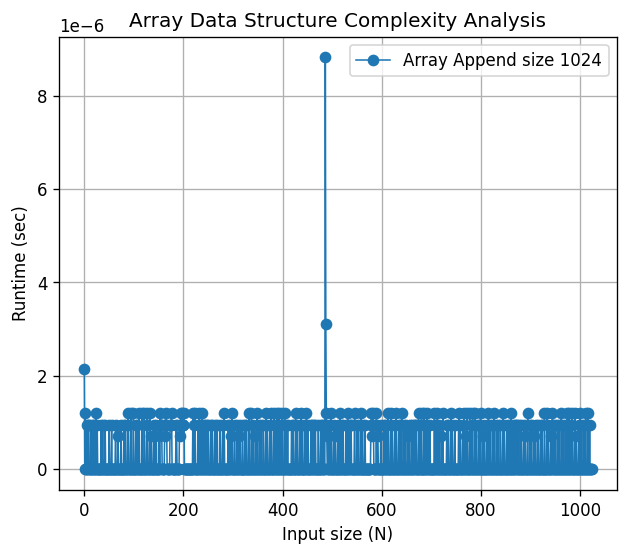

In [14]:
scale = 1024
legend = ("Array Append size {}".format(scale), "")
graph(*array_append_profiling(scale), legend)

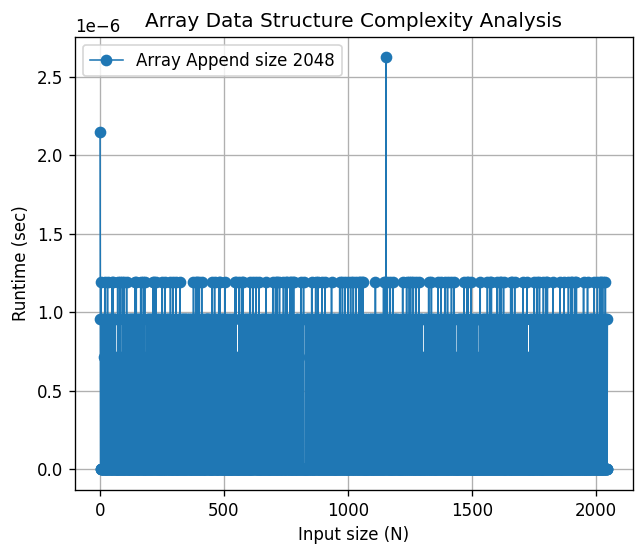

In [15]:
scale = 2048
legend = ("Array Append size {}".format(scale), "")
graph(*array_append_profiling(scale), legend)

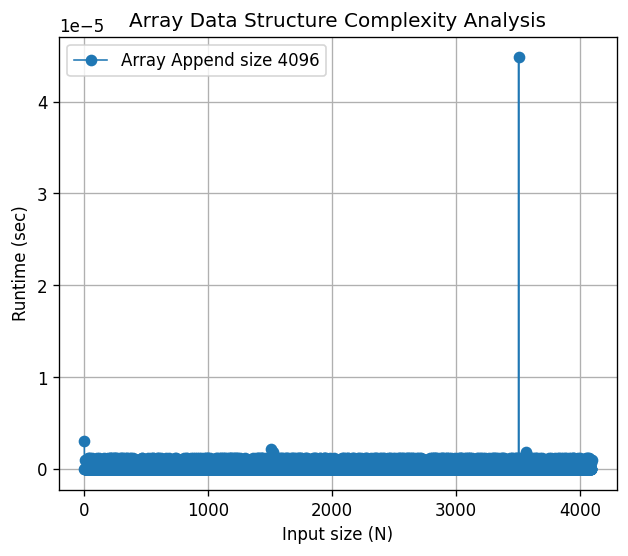

In [16]:
scale = 4096
legend = ("Array Append size {}".format(scale), "")
graph(*array_append_profiling(scale), legend)

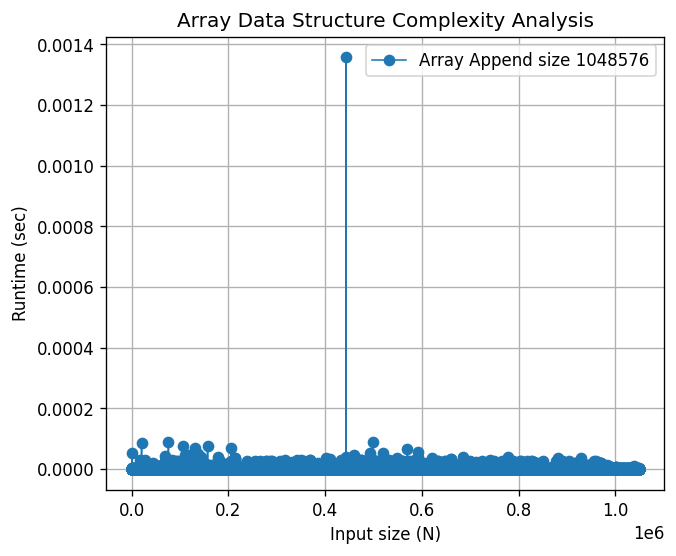

In [17]:
scale = 1048576
legend = ("Array Append size {}".format(scale), "")
graph(*array_append_profiling(scale), legend)